# **Step 1: Unzip the Dataset**

In [32]:
import zipfile
import pandas as pd
import os

# Step 1: Unzip the uploaded dataset
zip_path = "/content/thyroid+disease.zip"
extract_path = "content/thyroid_disease"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: List extracted files to identify the relevant CSV or data file
extracted_files = os.listdir(extract_path)
extracted_files


['allbp.names',
 'allbp.test',
 'new-thyroid.names',
 'ann-test.data',
 'allrep.data',
 'thyroid0387.names',
 'thyroid.theory',
 'new-thyroid.data',
 'ann-thyroid.names',
 'allrep.names',
 'allhypo.names',
 'allhypo.data',
 'dis.test',
 'dis.names',
 'costs',
 'sick-euthyroid.data',
 'allbp.data',
 'sick.data',
 'ann-train.data',
 'ann-Readme',
 'hypothyroid.data',
 'allrep.test',
 'HELLO',
 'allhyper.data',
 'sick-euthyroid.names',
 'allhypo.test',
 'hypothyroid.names',
 'dis.data',
 'allhyper.test',
 'thyroid0387.data',
 'sick.test',
 'Index',
 'allhyper.names',
 'sick.names']

# **Step 2: Load and Preprocess Thyroid Disease Dataset**

In [33]:
# Cell 1: Read and Load Data
import pandas as pd

# Load dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"

# Define column names from .names file
columns = [
    "class", "age", "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication",
    "thyroid_surgery", "query_hypothyroid", "query_hyperthyroid", "pregnant",
    "sick", "tumor", "lithium", "goitre", "TSH_measured", "TSH",
    "T3_measured", "T3", "TT4_measured", "TT4", "T4U_measured", "T4U",
    "FTI_measured", "FTI", "TBG_measured", "TBG"
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)
df.head()


,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


# **Step 3: Initial Data Exploration**

In [34]:
df

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


In [35]:
df.head()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   class                      3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [37]:
df.describe()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [38]:
# Count and display null values in each column of the dataset
null_counts = df.isnull().sum()
null_counts

,0
class,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
thyroid_surgery,0
query_hypothyroid,0
query_hyperthyroid,0
pregnant,0


# **Step 4: Data Cleaning and Preprocessing**

**TSH: Thyroid Stimulating Hormone**

**T3: Triiodothyronine**

**TT4: Total Thyroxine (Total T4)**

**T4U: Thyroxine Uptake**

**FTI: Free Thyroxine Index**

**TBG: Thyroxine Binding Globulin**

In [39]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert numeric columns to float
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI", "TBG"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill numeric NaNs with column mean
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop 'TBG' columns
df.drop(columns=['TBG_measured', 'TBG'], inplace=True)

# Drop rows with missing values in essential features
essential_features = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
df.dropna(subset=essential_features, inplace=True)

# Encode binary categorical columns
binary_cols = [
    "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication",
    "thyroid_surgery", "query_hypothyroid", "query_hyperthyroid",
    "pregnant", "sick", "tumor", "lithium", "goitre"
]
df[binary_cols] = df[binary_cols].replace({'f': 0, 't': 1, 'F': 0, 'M': 1})

# Fill missing sex with most common (mode = 0 or 1)
df["sex"] = df["sex"].fillna(0)

# Drop measured flags
df.drop(columns=["TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured"], inplace=True)

# Map class column
df['class'] = df['class'].replace({
    'negative': 0,
    'hypothyroid': 1
    # if you want multiclass later, you can add 'hyperthyroid': 2
})

# Keep only binary class
df = df[df['class'].isin([0, 1])]

# Final check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   class                      3163 non-null   int64  
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

/tmp/ipython-input-39-3092034781.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'f': 0, 't': 1, 'F': 0, 'M': 1})
/tmp/ipython-input-39-3092034781.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({


# **Step 5: Exploratory Data Analysis (EDA) – Target Class Distribution**

/tmp/ipython-input-40-3633556094.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


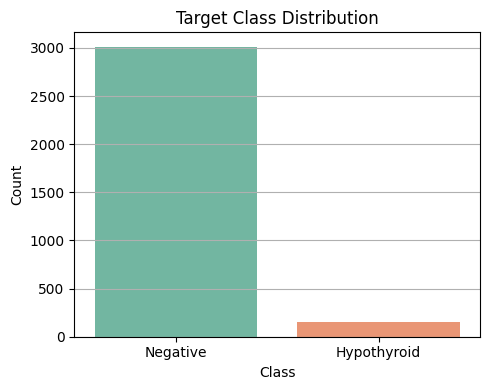

In [40]:
# Cell 3: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Target Class Distribution")
plt.xticks([0, 1], ["Negative", "Hypothyroid"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()






```
# This is formatted as code
```

## **Step 6: Feature Correlation Heatmap**

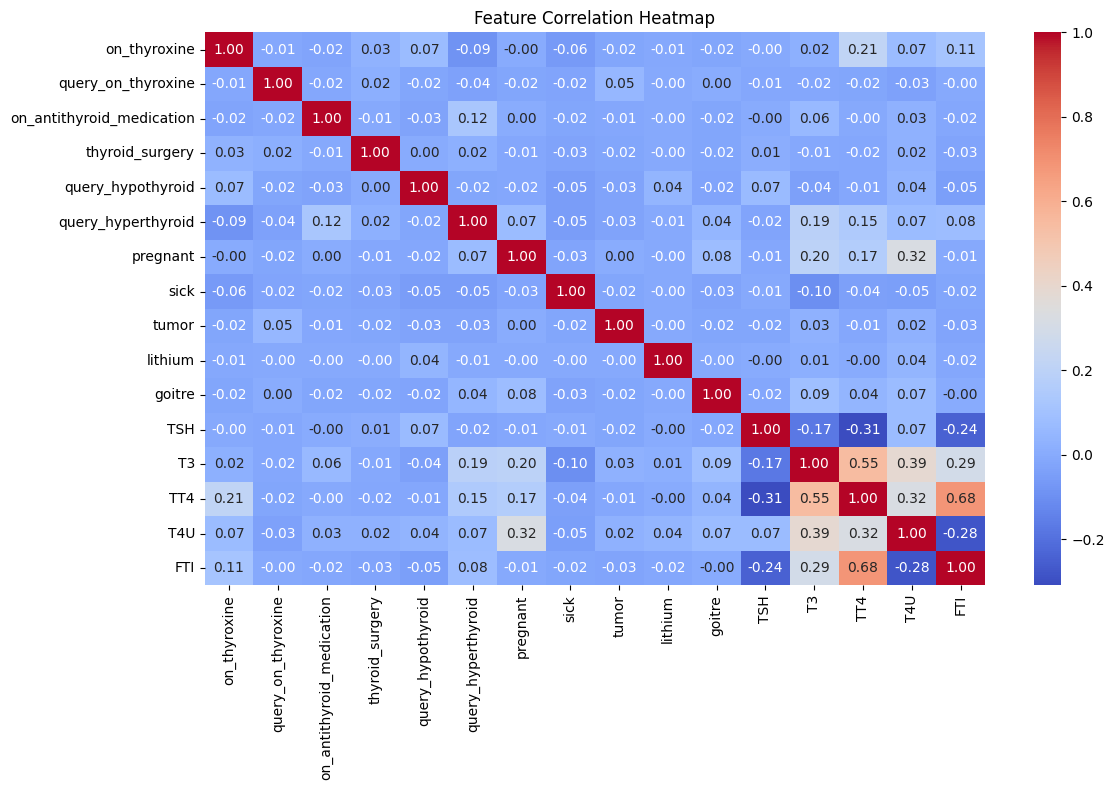

In [41]:
# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['class', 'age', 'sex']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## **Boxplots**

/tmp/ipython-input-42-1858129072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='pastel')


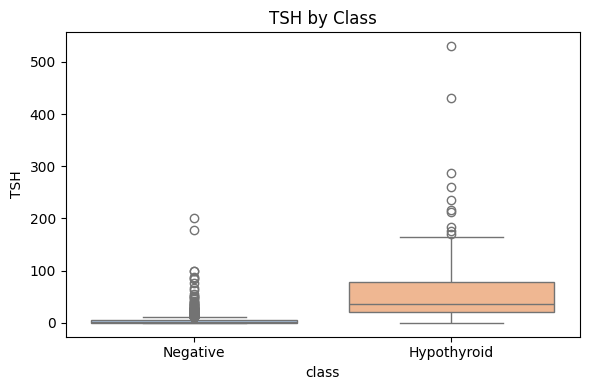

/tmp/ipython-input-42-1858129072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='pastel')


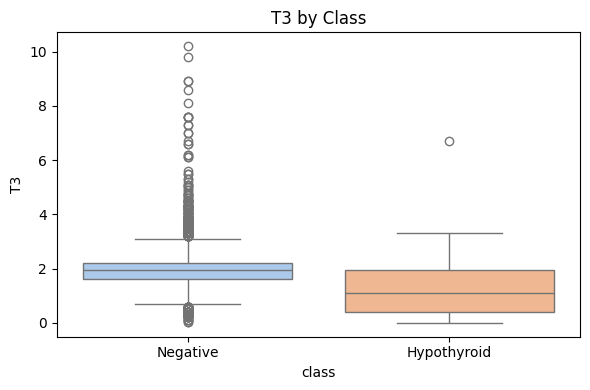

/tmp/ipython-input-42-1858129072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='pastel')


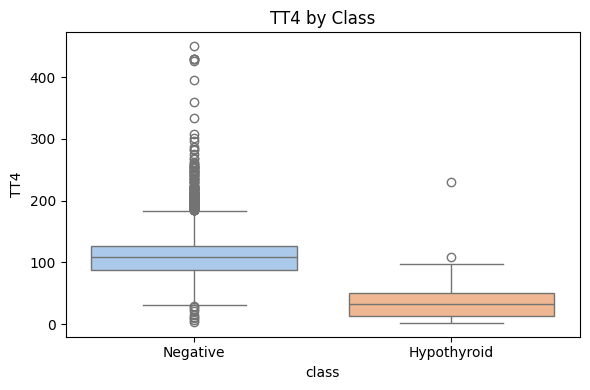

/tmp/ipython-input-42-1858129072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='pastel')


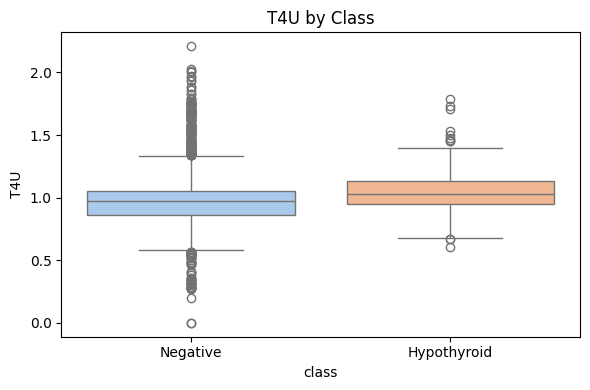

/tmp/ipython-input-42-1858129072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='pastel')


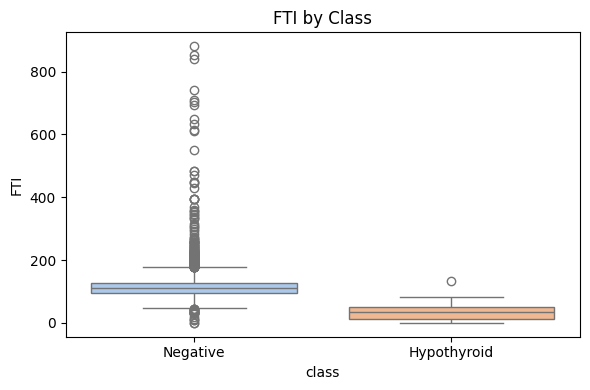

In [42]:

# 3. Boxplot of key numeric features grouped by class
for col in ["TSH", "T3", "TT4", "T4U", "FTI"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df, palette='pastel')
    plt.title(f"{col} by Class")
    plt.xticks([0, 1], ["Negative", "Hypothyroid"])
    plt.tight_layout()
    plt.show()


# **Step 8: Final Data Cleanup and Density Plots**

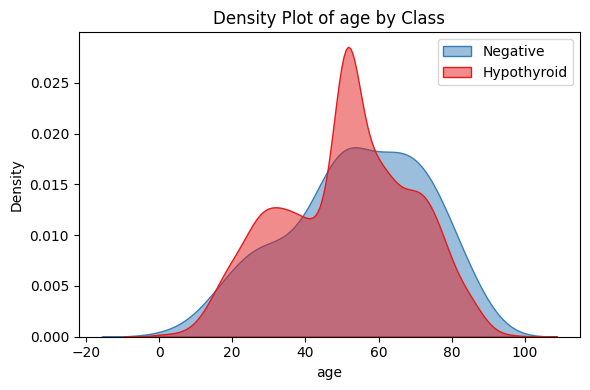

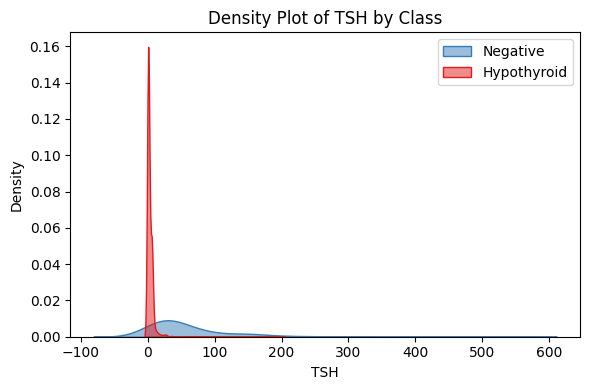

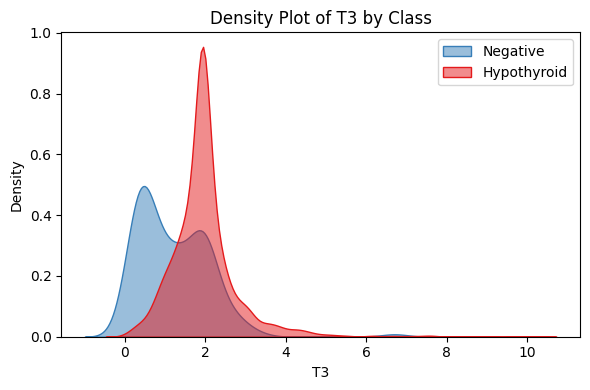

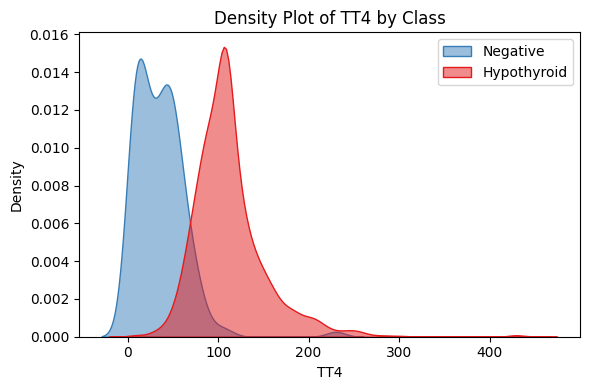

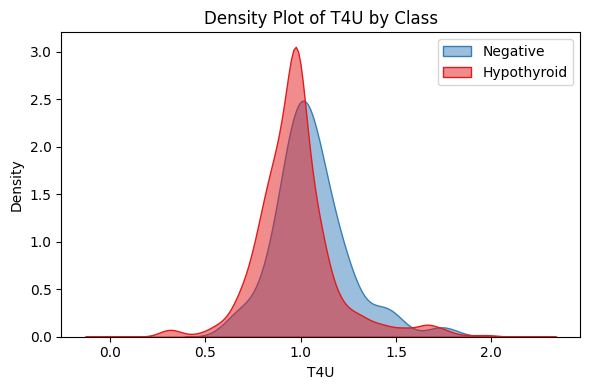

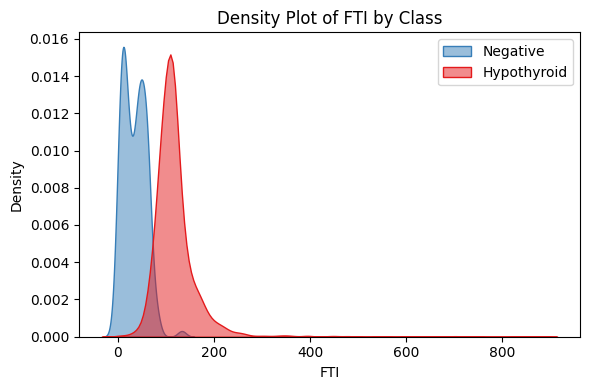

In [43]:
# Final type cleanup before plotting
# Drop rows with non-finite values in numeric columns
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
df_cleaned = df.dropna(subset=numeric_cols).copy()

df_cleaned = df_cleaned.copy()
df_cleaned['class'] = pd.to_numeric(df_cleaned['class'], errors='coerce').fillna(0).astype(int)

for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Re-plot KDEs safely
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(
        data=df_cleaned,
        x=col,
        hue='class',
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette='Set1'
    )
    plt.title(f"Density Plot of {col} by Class")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(labels=["Negative", "Hypothyroid"])
    plt.tight_layout()
    plt.show()


# **Step 9: Final Preprocessing, Train-Test Split, and Feature Scaling**

In [44]:
# Cell 4: Final preprocessing + train-test split + scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare features and target
X = df.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes after preprocessing
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((2530, 18), (633, 18), (2530,), (633,))

# **Step 10: Importing Libraries and Tools**

In [45]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Scikit-learn models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE

# Classical models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Data balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# **Step 11: Model Evaluation and Neural Network**

In [46]:
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    """Helper function to train and evaluate a model."""
    print(f"\n--- Training and evaluating: {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Handle probability prediction for models that support it
    y_proba = None
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_proba = model.decision_function(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Hypothyroid"], yticklabels=["Negative", "Hypothyroid"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return y_proba

def build_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# **Step 12: Feature Preparation and Scaling for Model Training**

In [47]:


# Prepare features and target
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Step 13: Training and Evaluating Multiple Models**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training and evaluating: Logistic Regression ---

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       603
           1       0.93      0.83      0.88        30

    accuracy                           0.99       633
   macro avg       0.96      0.92      0.94       633
weighted avg       0.99      0.99      0.99       633



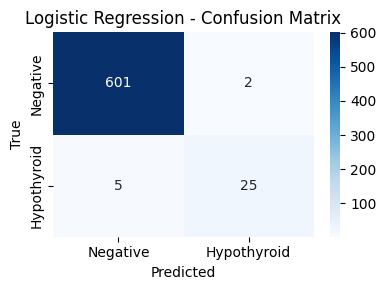


--- Training and evaluating: Support Vector Machine ---

Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       603
           1       0.90      0.60      0.72        30

    accuracy                           0.98       633
   macro avg       0.94      0.80      0.85       633
weighted avg       0.98      0.98      0.98       633



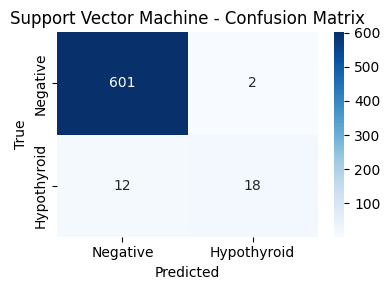


--- Training and evaluating: Random Forest ---

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       0.90      0.93      0.92        30

    accuracy                           0.99       633
   macro avg       0.95      0.96      0.96       633
weighted avg       0.99      0.99      0.99       633



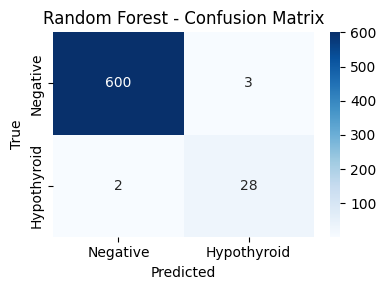

Custom Neural Network Test Accuracy: 0.9858
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       603
           1       0.86      0.83      0.85        30

    accuracy                           0.99       633
   macro avg       0.93      0.91      0.92       633
weighted avg       0.99      0.99      0.99       633



In [48]:
all_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, ),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Custom Neural Network": build_nn_model(X_train_scaled.shape[1])
}

roc_results_full_data = {}
for name, model in all_models.items():
    if name == "Custom Neural Network":
        es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[es], verbose=0)
        loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        print(f"{name} Test Accuracy: {accuracy:.4f}")
        y_pred_proba_nn = model.predict(X_test_scaled).ravel()
        y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)
        print(classification_report(y_test, y_pred_nn))
        roc_results_full_data[name] = y_pred_proba_nn
    else:
        y_proba = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
        roc_results_full_data[name] = y_proba


# **Plot ROC Curve**

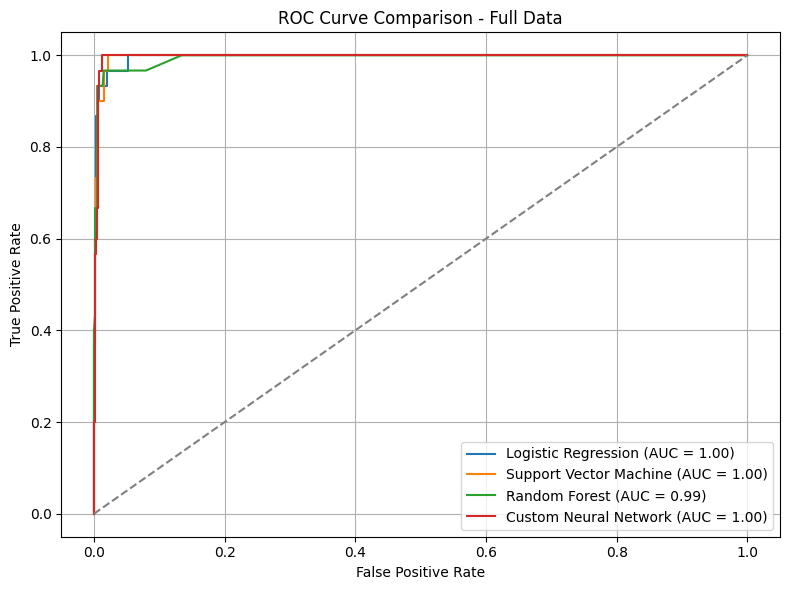

In [49]:
plt.figure(figsize=(8, 6))
for name, y_proba in roc_results_full_data.items():
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Full Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Step 15: Feature Selection Using Mutual Information**

In [50]:
k_features = 10
selector_mi = SelectKBest(mutual_info_classif, k=k_features)
X_train_mi = selector_mi.fit_transform(X_train_scaled, y_train)
X_test_mi = selector_mi.transform(X_test_scaled)
selected_features_mi = X.columns[selector_mi.get_support()]
print(f"Selected Features (MI): {list(selected_features_mi)}")


Selected Features (MI): ['age', 'sex', 'query_on_thyroxine', 'thyroid_surgery', 'query_hyperthyroid', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


# **Evaluate Models with Mutual Information Features**

In [51]:
all_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),

}



Evaluating Logistic Regression on MI-selected features

--- Training and evaluating: Logistic Regression (MI) ---

Logistic Regression (MI) Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       603
           1       0.88      0.77      0.82        30

    accuracy                           0.98       633
   macro avg       0.94      0.88      0.91       633
weighted avg       0.98      0.98      0.98       633



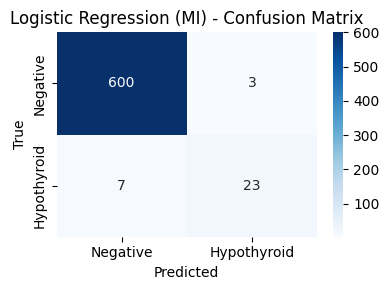


Evaluating Support Vector Machine on MI-selected features

--- Training and evaluating: Support Vector Machine (MI) ---

Support Vector Machine (MI) Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       603
           1       0.88      0.77      0.82        30

    accuracy                           0.98       633
   macro avg       0.94      0.88      0.91       633
weighted avg       0.98      0.98      0.98       633



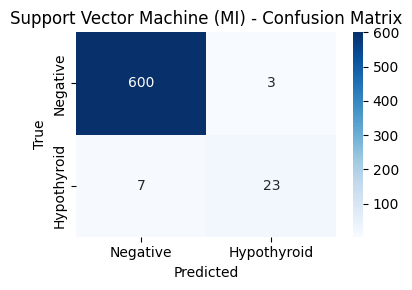


Evaluating Random Forest on MI-selected features

--- Training and evaluating: Random Forest (MI) ---

Random Forest (MI) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       0.90      0.93      0.92        30

    accuracy                           0.99       633
   macro avg       0.95      0.96      0.96       633
weighted avg       0.99      0.99      0.99       633



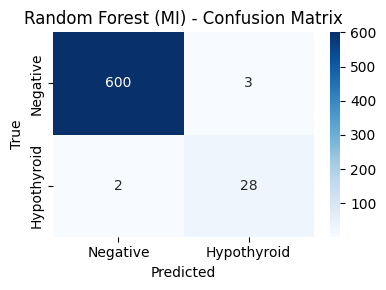

In [52]:
# Evaluate classical models (Logistic Regression, SVM, RF)
roc_results_mi = {}
for name, model in all_models.items():
    print(f"\nEvaluating {name} on MI-selected features")
    model_mi = model.__class__(**model.get_params())  # Copy model
    y_proba = evaluate_model(model_mi, X_train_mi, X_test_mi, y_train, y_test, f"{name} (MI)")
    roc_results_mi[f"{name} (MI)"] = y_proba


In [53]:
print("\nEvaluating Custom Neural Network on MI-selected features")

roc_results_mi = {}

nn_model_mi = build_nn_model(X_train_mi.shape[1])
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
nn_model_mi.fit(X_train_mi, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[es], verbose=0)

loss, acc = nn_model_mi.evaluate(X_test_mi, y_test, verbose=0)
print(f"Custom Neural Network (MI) Accuracy: {acc:.4f}")

y_pred_proba_nn_mi = nn_model_mi.predict(X_test_mi).ravel()
y_pred_nn_mi = (y_pred_proba_nn_mi > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_mi))

roc_results_mi["Custom Neural Network (MI)"] = y_pred_proba_nn_mi



Evaluating Custom Neural Network on MI-selected features


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Custom Neural Network (MI) Accuracy: 0.9842
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       603
           1       0.83      0.83      0.83        30

    accuracy                           0.98       633
   macro avg       0.91      0.91      0.91       633
weighted avg       0.98      0.98      0.98       633



#**Plot ROC for Mutual Information Models**

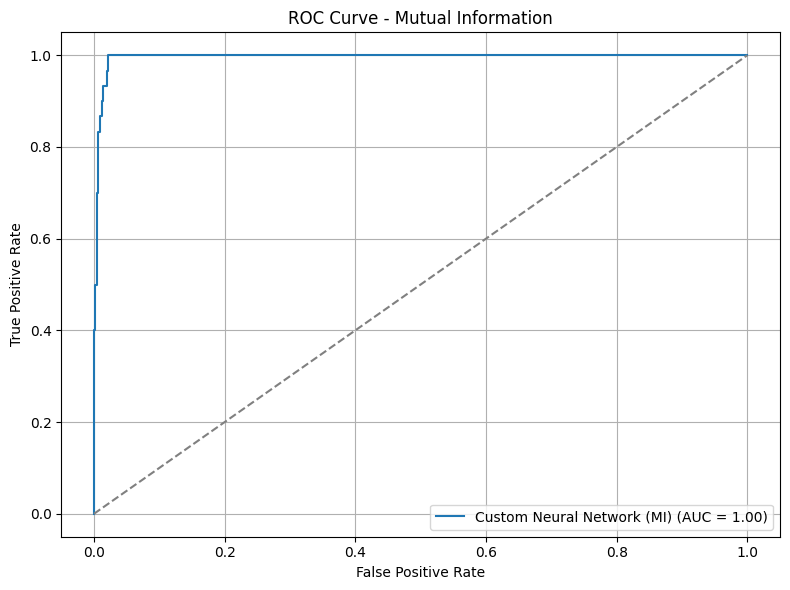

In [54]:
plt.figure(figsize=(8, 6))
for name, y_proba in roc_results_mi.items():
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Mutual Information")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#  **Deep learning Model**

## **CNN Model**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [56]:
# Reshape: from (samples, features) to (samples, features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print("CNN Input Shape:", X_train_cnn.shape)


CNN Input Shape: (2530, 18, 1)


In [57]:

# Reshape input if needed
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Rebuild CNN with tuning
cnn_model_tuned = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.4),

    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model_tuned.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_tuned = cnn_model_tuned.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6950 - loss: 0.6107 - val_accuracy: 0.9466 - val_loss: 0.3323
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9537 - loss: 0.2745 - val_accuracy: 0.9466 - val_loss: 0.2322
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9490 - loss: 0.2331 - val_accuracy: 0.9466 - val_loss: 0.2093
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9522 - loss: 0.2073 - val_accuracy: 0.9466 - val_loss: 0.1917
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9615 - loss: 0.1640 - val_accuracy: 0.9486 - val_loss: 0.1788
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9545 - loss: 0.1694 - val_accuracy: 0.9486 - val_loss: 0.1661
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9539 - loss: 0.1519 - val_accuracy: 0.9486 - val_loss: 0.1544
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9550 - loss: 0.1602 - val_accuracy: 0.9486 - val_loss: 0.1470
E

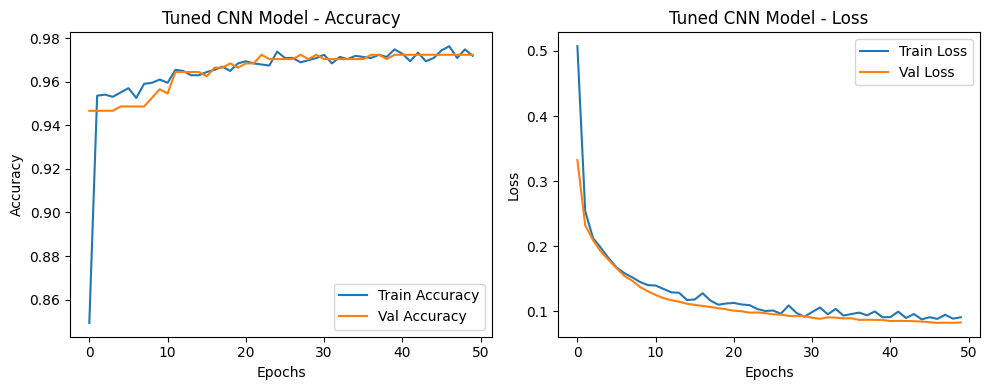

In [58]:
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_tuned, "Tuned CNN Model")


In [59]:
# Predict probabilities and class labels
y_pred_proba_cnn = cnn_model_tuned.predict(X_test_cnn).ravel()
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [60]:
from sklearn.metrics import classification_report

print("Classification Report for Tuned CNN:\n")
print(classification_report(y_test, y_pred_cnn))


Classification Report for Tuned CNN:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       603
           1       0.77      0.67      0.71        30

    accuracy                           0.97       633
   macro avg       0.88      0.83      0.85       633
weighted avg       0.97      0.97      0.97       633



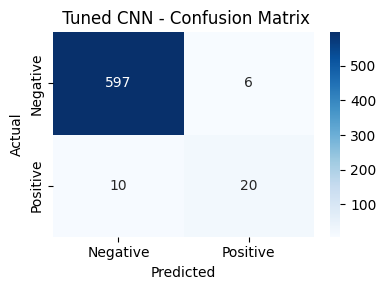

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title(" Tuned CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
